In [112]:
import random
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import seaborn as sns
import scipy.stats as stats

import matplotlib.pyplot as plt
import matplotlib 
import matplotlib.colors as colors
%matplotlib inline



In [113]:
train = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')
print("Train set size:", train.shape)

Train set size: (5268, 13)


In [114]:
train.head(3)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...


In [115]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3562 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


In [116]:
train.describe()

,Aboard,Fatalities,Ground
count,5246.000000,5256.000000,5246.000000
mean,27.554518,20.068303,1.608845
std,43.076711,33.199952,53.987827
min,0.000000,0.000000,0.000000
25%,5.000000,3.000000,0.000000
50%,13.000000,9.000000,0.000000
75%,30.000000,23.000000,0.000000
max,644.000000,583.000000,2750.000000


In [117]:
train.isnull().sum()

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [118]:
"""Time - High percentage of missing values
Flight Number - High percentage of missing values
Route - High percentage of missing values
cn/In - High percentage of missing values
Summary - High percentage of missing values, but the data is essential to this project
These columns can be deleted, as they are not necessary"""

'Time - High percentage of missing values\nFlight Number - High percentage of missing values\nRoute - High percentage of missing values\ncn/In - High percentage of missing values\nSummary - High percentage of missing values, but the data is essential to this project\nThese columns can be deleted, as they are not necessary'

In [119]:
##Counting the frequency of each value in Time column

In [120]:
train['Time'].value_counts()

15:00    32
12:00    31
11:00    29
16:00    26
19:30    26
         ..
13:49     1
00:13     1
12:49     1
14:54     1
07:13     1
Name: Time, Length: 1005, dtype: int64

In [121]:
##Box Plots, Dist Plot  -- Distribution of values over the given range for the dataset for fatalities column

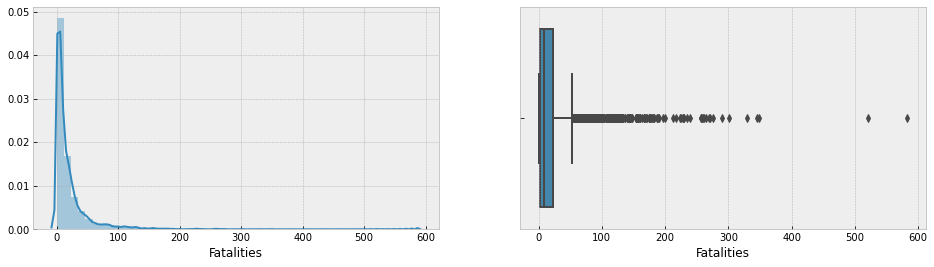

In [122]:
plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
sns.distplot(train['Fatalities'])

plt.subplot(2,2,2)
sns.boxplot(train['Fatalities'])

plt.show()

In [123]:
##dist plot and box plot for Aboard Column

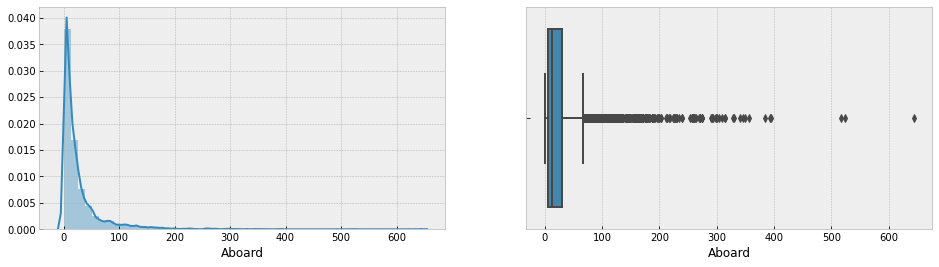

In [124]:
plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
sns.distplot(train['Aboard'])

plt.subplot(2,2,2)
sns.boxplot(train['Aboard'])

plt.show()

In [125]:
##Date Column is converted to Date Time
train['Date'] = pd.to_datetime(train['Date'])
train['Date'] = train['Date'].dt.strftime("%d/%m/%Y")


In [126]:
train.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,17/09/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,12/07/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,06/08/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,17/10/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [127]:
######Replace the Time column with maximum repeated value
train_first = train.copy()
train['Time'].fillna('15:00', inplace = True)
train['Time'] = train['Time'].replace(np.nan, '00:00') ####
train['Time'] = train['Time'].str.replace('c: ', '')
train['Time'] = train ['Time'].str.replace('c:', '')
train['Time'] = train ['Time'].str.replace('c', '')
train['Time'] = train ['Time'].str.replace('12\'20', '12:20')
train['Time'] = train ['Time'].str.replace('18.40', '18:40')
train['Time'] = train ['Time'].str.replace('0943', '09:43')
train['Time'] = train ['Time'].str.replace('22\'08', '22:08')
train['Time'] = train ['Time'].str.replace('114:20', '00:00')

In [128]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          5268 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3562 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


In [129]:
train.isnull().sum()

Date               0
Time               0
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [130]:

train["Survival Rate"] = 100 * (train["Aboard"] - train["Fatalities"]) / train["Aboard"]
train['Survival Rate'].fillna(0, inplace = True)


In [131]:
train['Year'] = pd.DatetimeIndex(train['Date']).year

In [132]:
train.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Survival Rate,Year
0,17/09/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",50.0,1908
1,12/07/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,0.0,1912
2,06/08/1913,15:00,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,0.0,1913
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,30.0,1913
4,17/10/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,0.0,1913


In [133]:
## Some statistics of Operator and Fatalaties column to use further

operator = train[['Operator','Fatalities']].groupby('Operator').agg(['sum','count'])

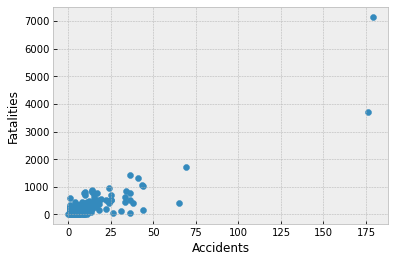

In [134]:
## Cleaning Fatalities(sum) column and plotting them against the accidents(count)

train['Fatalities'] = train['Fatalities'].fillna(0)
X = operator['Fatalities','count']
Y = operator['Fatalities','sum']
plt.scatter(X, Y,label='Operators')
plt.ylabel('Fatalities')
plt.xlabel('Accidents');

In [135]:
## checking fatality rate during an accident

train_first['Fatalities_percentage'] = train['Fatalities'] / train['Aboard']
print(train_first['Fatalities_percentage'].head(5))

0    0.5
1    1.0
2    1.0
3    0.7
4    1.0
Name: Fatalities_percentage, dtype: float64


In [136]:
## Finding variations in fatalities using Skewness, Kurtosis of Fatalities feature.

print("Skewness: %f" % train['Fatalities'].skew())
print("Kurtosis: %f" % train['Fatalities'].kurt())

Skewness: 4.952818
Kurtosis: 42.889113


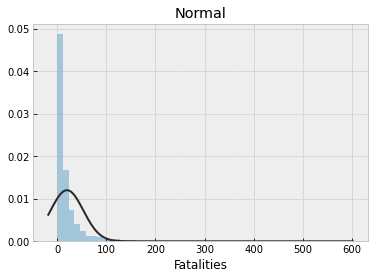

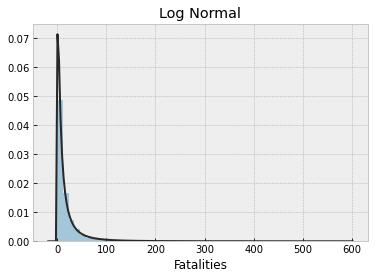

In [137]:
## Distribution of fatalities

y = train['Fatalities']
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=stats.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=stats.lognorm)

In [138]:
## Interesting facts by applying log value for Fatalities

train["log_Fatalities"] = np.log1p(train["Fatalities"])

In [139]:
## Finding Skewness, Kurtosis for log value of Fatalities.

print("Skewness: %f" % train['log_Fatalities'].skew())
print("Kurtosis: %f" % train['log_Fatalities'].kurt())

Skewness: 0.339361
Kurtosis: -0.467497


In [140]:
train.head(3)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Survival Rate,Year,log_Fatalities
0,17/09/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",50.0,1908,0.693147
1,12/07/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,0.0,1912,1.791759
2,06/08/1913,15:00,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,0.0,1913,0.693147


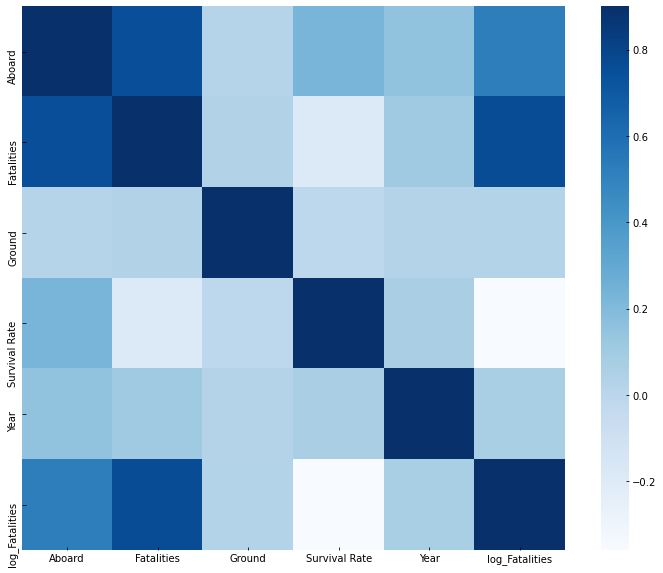

In [141]:
## Heat map for correlation matrix of training dataset

corr = train.corr()
plt.subplots(figsize=(13,10))
sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True)  

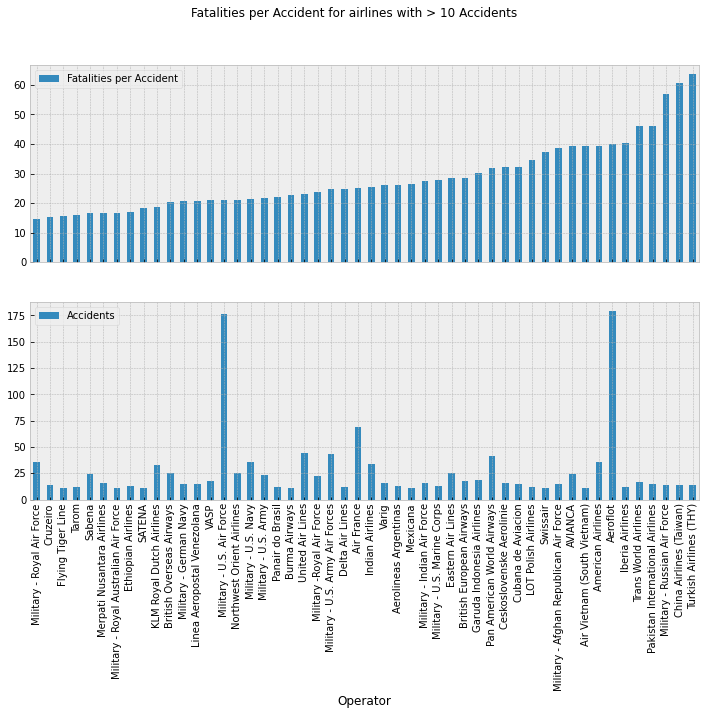

In [142]:
## Proportion of fatalities per accident for specific operators using a bar graph

matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)
props = operator['Fatalities'].reset_index()
props['Fatalities per Accident'] = props['sum']/props['count']
props.columns = ['Operator','Fatalities','Accidents','Fatalities per Accident']

fig_p,(axp1,axp2) = plt.subplots(2,1,sharex = True)
minacc = 10
fig_p.suptitle('Fatalities per Accident for airlines with > %s Accidents' % minacc)
propstoplot = props[props['Accidents']>minacc]
propstoplot.sort_values('Fatalities per Accident').tail(50).plot(x = 'Operator'
                                                               , y = 'Fatalities per Accident'
                                                               , ax = axp1
                                                               , kind = 'bar'
                                                               , grid = True)
propstoplot.sort_values('Fatalities per Accident').tail(50).plot(x = 'Operator'
                                                               , y = 'Accidents'
                                                               , ax = axp2
                                                               , kind = 'bar'
                                                               , grid = True)

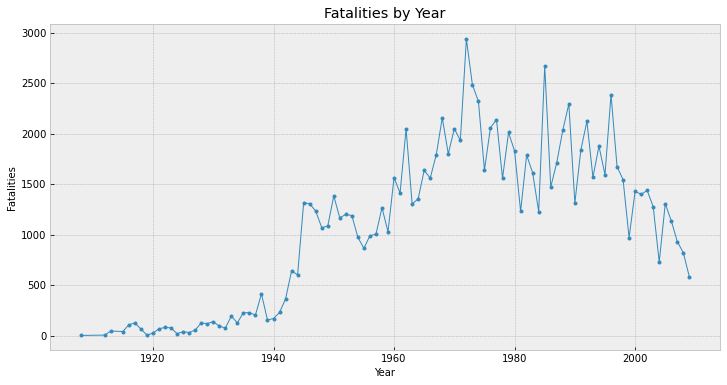

In [143]:
## Plot to check the number of fatalities yearly.

yearly = train[['Year','Fatalities']].groupby('Year').agg(['sum','count'])
plt.style.use('bmh')
plt.figure(figsize=(12,6))
yearly['Fatalities','sum'].plot(title='Fatalities by Year',marker = ".", linewidth=1)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Fatalities', fontsize=10)
plt.show()